In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import cv2
from matplotlib import pyplot as plt
import glob 

### Loading data

In [20]:
path=glob.glob("/content/gdrive/MyDrive/colab/FYP/imgDraw/*.png")

In [21]:
print(path[:3])

[]


### Using openCV

In [14]:
# a=np.array(((20, 189, 267)))

In [15]:
 from keras.preprocessing.image import img_to_array

In [17]:
# img=cv2.imread(fl)
# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [18]:
# ab=np.array(gray)
a2=[]

In [19]:
arr=[]
lbl=[]
for indx,fl in enumerate(path):
  img=cv2.imread(fl)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # gray=np.array(gray)
  arr.append(gray)
  lbl.append(indx)
  a2.append(img_to_array(gray))
  # plt.imshow(img)
  # cv2.waitKey(2000)
  # cv2.destroyAllWindows
  

In [ ]:
a2=np.array(a2)

In [ ]:
a2.shape

(20,)

In [ ]:
# print(arr)

In [ ]:
import numpy as np
arr=np.array(arr)
lbl=np.array(lbl)
print(lbl)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
# a2.reshape(20, 189, 267)

In [ ]:
arr.shape

(20,)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(arr,lbl,test_size=.2)

In [ ]:
print((len(x_train)))

16


In [ ]:
print(y_train)

[ 8 17  6 10 16  7 15 19  5  2  0 11 12  9 18 13]


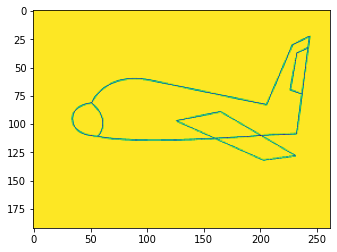

In [ ]:
plt.imshow(x_train[10])

In [ ]:
from tensorflow.python.keras import layers
from tensorflow import keras
import tensorflow as tf

In [ ]:
x_train.shape

(16,)

### Data Preprocessing

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_train.reshape(x_test.shape[0],28,28,1).astype('float32')

x_train/=2-0.5
x_test/=2-0.5

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

ValueError: ignored

In [ ]:
# x_train.shape

### The Model

In [ ]:
model=keras.Sequential()
model.add(layers.Convolution2D(8, (3, 3),input_shape=(28,28,1),
                        padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(16, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 

adam=tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model.fit(x=x_train,y=y_train,validation_split=0.1,batch_size=256,verbose=2,epochs=5)

ValueError: ignored

### Testing the Model and Accuracy

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1]*100))

### Prediction and output

In [ ]:
from random import randint

In [ ]:
idx=randint(0,len(x_test))
img=x_test[idx]
plt.imshow(img) 

In [ ]:
p=model.predict(img)
output=arr[p]
plt.imshow(output)

### Download the Model

In [ ]:
!zip -r model.zip 

	zip warning: name not matched: CNN

zip error: Nothing to do! (try: zip -r model.zip . -i CNN)


In [ ]:
from google.colab import files
files.download('model.zip')